### <center> Yousef Ibrahim Gomaa Mahmoud </center>
---
#### Session 7 - Insurance Linear Regression

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
df = pd.read_csv('insurance.csv')

#### Data Exploration

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
1265,64,male,23.760,0,yes,southeast,26926.51440
757,47,female,27.830,0,yes,southeast,23065.42070
726,41,male,28.405,1,no,northwest,6664.68595
1076,47,female,32.000,1,no,southwest,8551.34700
614,20,female,33.000,0,no,southeast,1880.07000
971,34,female,23.560,0,no,northeast,4992.37640
546,28,male,35.435,0,no,northeast,3268.84665
929,41,male,34.210,1,no,southeast,6289.75490
226,28,male,38.060,0,no,southeast,2689.49540
672,36,male,29.700,0,no,southeast,4399.73100


In [20]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [21]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [22]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [23]:
df.drop_duplicates(inplace=True)

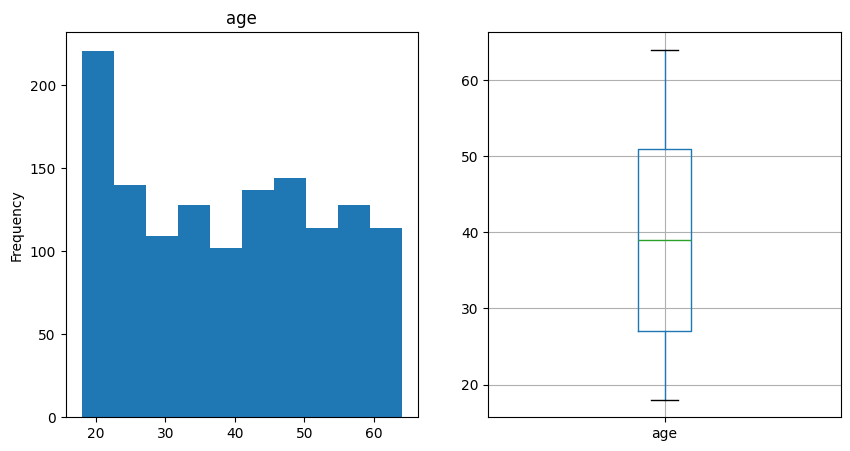

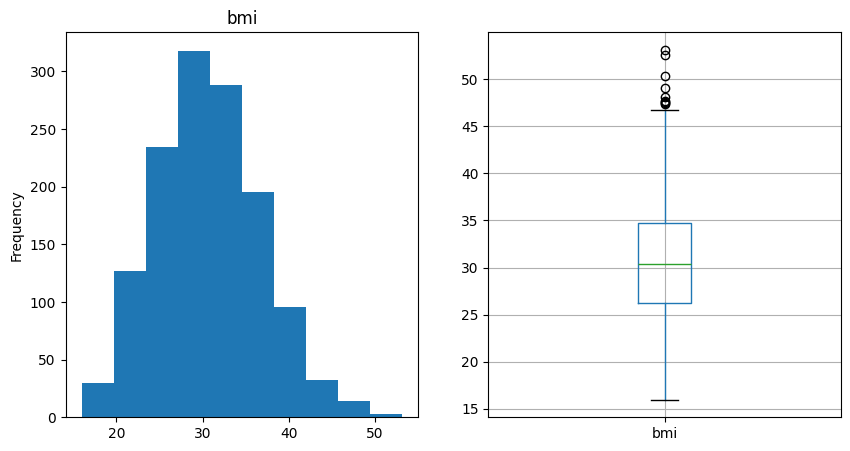

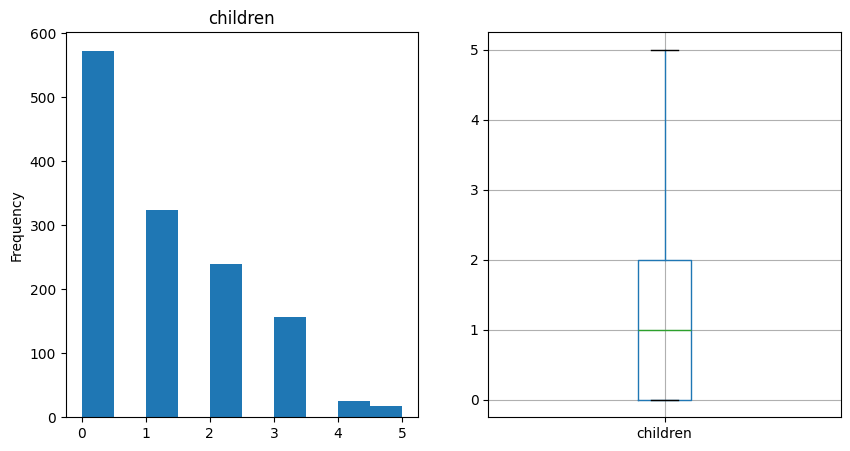

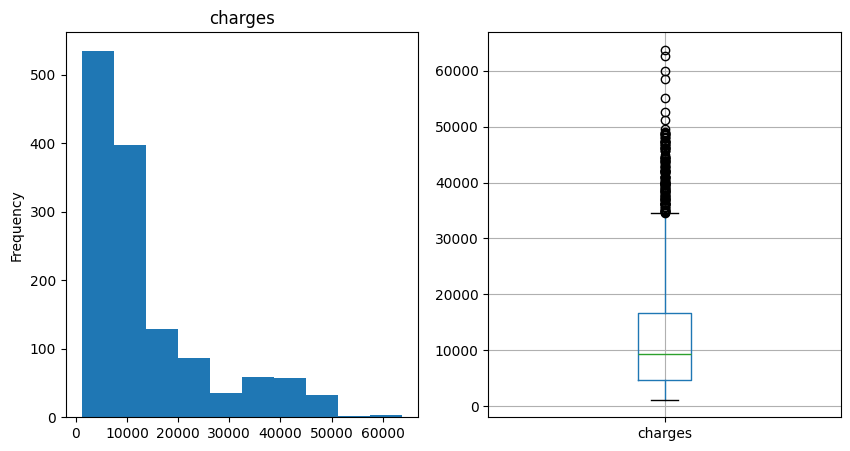

In [24]:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    df[col].plot(kind='hist')
    plt.title(col)
    plt.subplot(1, 2, 2)
    df.boxplot([col])
    plt.show()


In [25]:
# q1 = df[col].quantile(0.25)
# q3 = df[col].quantile(0.75)
# iqr = q3 - q1
# df = df[(df[col] > q1 - 1.5 * iqr) & (df[col] < q3 + 1.5 * iqr)]

#### Remark:
* I commented the outlier removal code above as it initially gave a R2 Score of 55.95% compared to the current one of 77.7%

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include=object).columns:
    df[col] = le.fit_transform(df[col])

df.sample(10)

,age,sex,bmi,children,smoker,region,charges
990,26,0,19.800,1,0,3,3378.91000
537,46,0,30.200,2,0,3,8825.08600
785,35,0,27.700,3,0,3,6414.17800
588,61,0,35.910,0,0,0,13635.63790
158,30,1,35.530,0,1,2,36950.25670
81,45,0,38.285,0,0,0,7935.29115
338,50,1,32.300,1,1,0,41919.09700
836,36,1,31.500,0,0,3,4402.23300
922,38,1,31.000,1,0,3,5488.26200
668,62,1,32.015,0,1,0,45710.20785


In [27]:
x = df.drop('charges', axis=1)
y = df['charges']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 43)

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

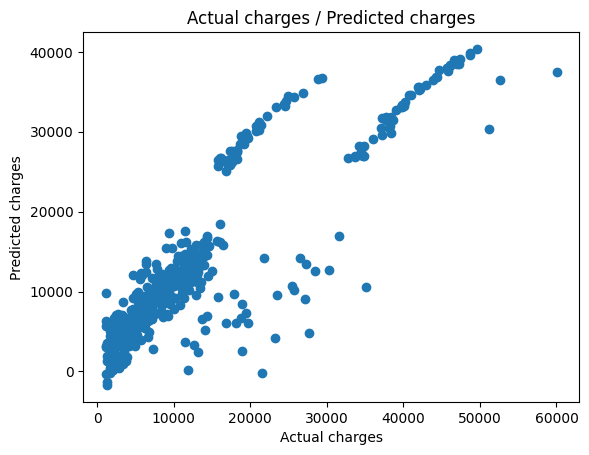

In [29]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Actual charges / Predicted charges')
plt.show()

In [30]:
import sklearn.metrics as metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4109.56194306673
Mean Squared Error: 34619237.481131025
Root Mean Squared Error: 5883.811475661931
R2 Score: 0.7772408450170489
